In [35]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [136]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('reduced_data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df = df[1:]

In [137]:
#df = df.iloc[:int(100000)]

In [138]:
#df.to_csv('reduced_data.csv', index=False)  

In [139]:
df['target'] = df['target'].astype(int)
#df.dtypes

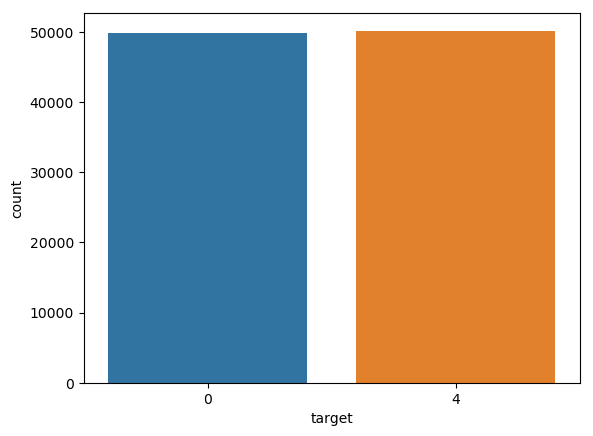

In [140]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [141]:
data=df[['text','target']]

In [142]:
data['target'] = data['target'].replace(4,1)

C:\Users\LPras\AppData\Local\Temp\ipykernel_36628\2499609609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [143]:
data['target'].unique()

array([1, 0])

In [144]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [145]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [146]:
dataset = pd.concat([data_pos, data_neg])

In [147]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

39967          @psychicken single? uh oh. what happened?  
39968    my irc bot's configuration and custom plugins ...
39970    @tallulahremiter lu!!!! i'm reading the interv...
39973                 @thisisheck fucking sick man....... 
39974    @daveracingkites i totes would come visit your...
Name: text, dtype: object

In [148]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [149]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

1     @sarahelizabetho ahhhh yess!! havent like..for...
2     @bluebutterfly6 felllow @ciaobella6, @loveyea ...
3     @tamaraschilling great!!! don't want offend an...
10                    weee got another follower #social
12                     @mcflyharry harry, you're alive!
Name: text, dtype: object

In [150]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

39967                     psychicken single uh oh happened
39968    irc bots configuration custom plugins lost har...
39970    tallulahremiter lu im reading interview but te...
39973                          thisisheck fucking sick man
39974    daveracingkites totes would come visit tent bu...
Name: text, dtype: object

In [151]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

39967                     psychicken single uh oh happened
39968    irc bots configuration custom plugins lost har...
39970    tallulahremiter lu im reading interview but te...
39973                          thisisheck fucking sick man
39974    daveracingkites totes would come visit tent bu...
Name: text, dtype: object

In [152]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

39967                     psychicken single uh oh happened
39968    irc bots configuration custom plugins lost har...
39970    tallulahremiter lu im reading interview but te...
39973                          thisisheck fucking sick man
39974    daveracingkites totes would come visit tent bu...
Name: text, dtype: object

In [153]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()


39967                     psychicken single uh oh happened
39968    irc bots configuration custom plugins lost har...
39970    tallulahremiter lu im reading interview but te...
39973                          thisisheck fucking sick man
39974    daveracingkites totes would come visit tent bu...
Name: text, dtype: object

In [154]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()


1     sarahelizabetho ahhhh yess havent likeforever ...
2     bluebutterfly felllow ciaobella loveyea amp je...
3     tamaraschilling great dont want offend anyone ...
10                     weee got another follower social
12                         mcflyharry harry youre alive
Name: text, dtype: object

In [155]:
dataset['text']

1        sarahelizabetho ahhhh yess havent likeforever ...
2        bluebutterfly felllow ciaobella loveyea amp je...
3        tamaraschilling great dont want offend anyone ...
10                        weee got another follower social
12                            mcflyharry harry youre alive
                               ...                        
39967                     psychicken single uh oh happened
39968    irc bots configuration custom plugins lost har...
39970    tallulahremiter lu im reading interview but te...
39973                          thisisheck fucking sick man
39974    daveracingkites totes would come visit tent bu...
Name: text, Length: 40000, dtype: object

In [156]:
X=data.text
y=data.target

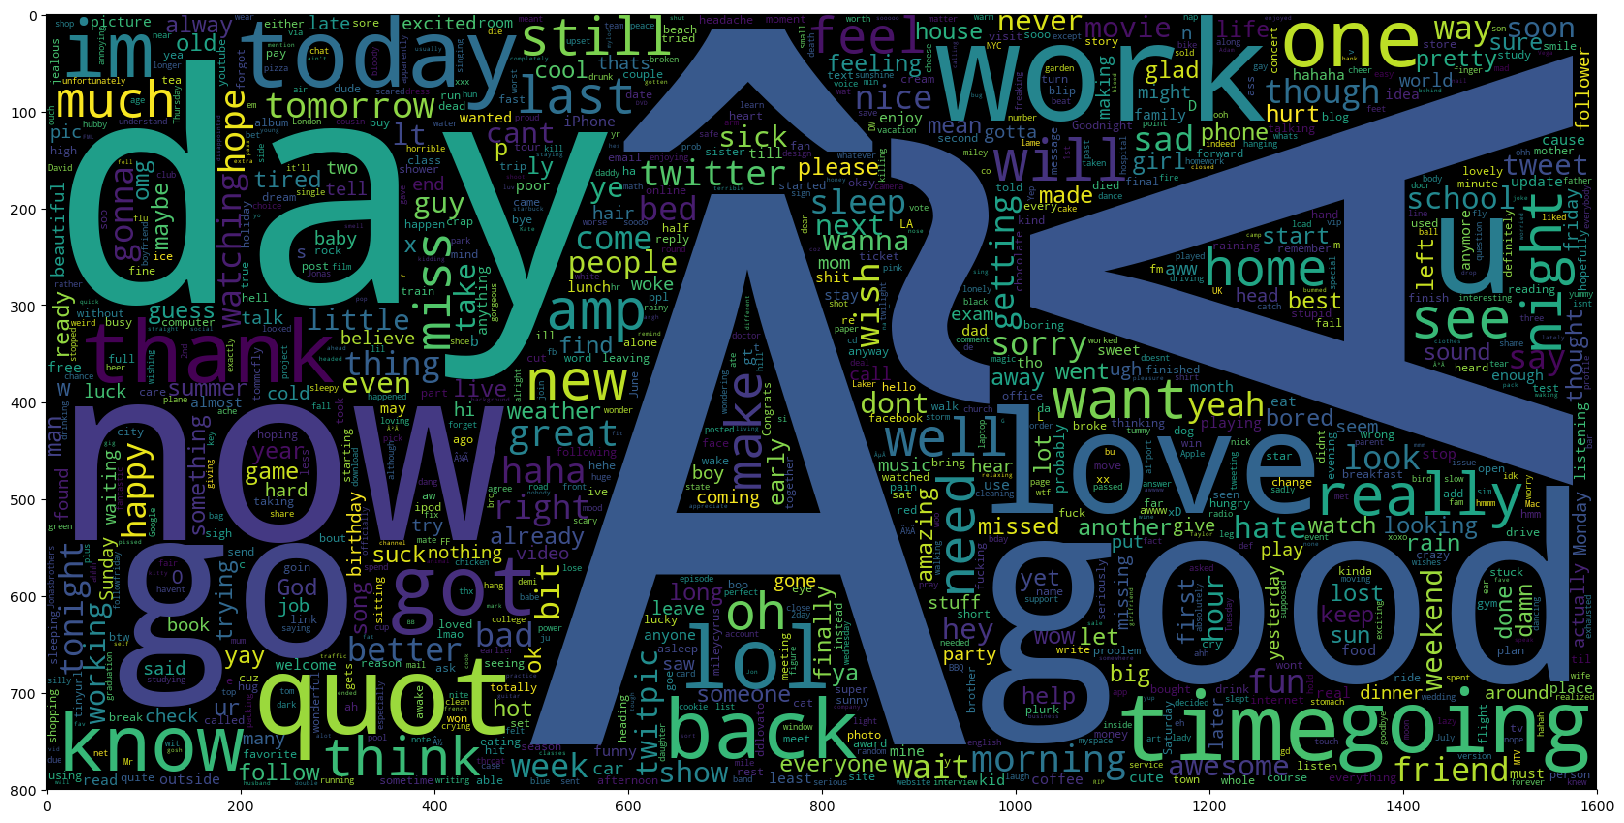

In [157]:
data_neg = data['text'][:50000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

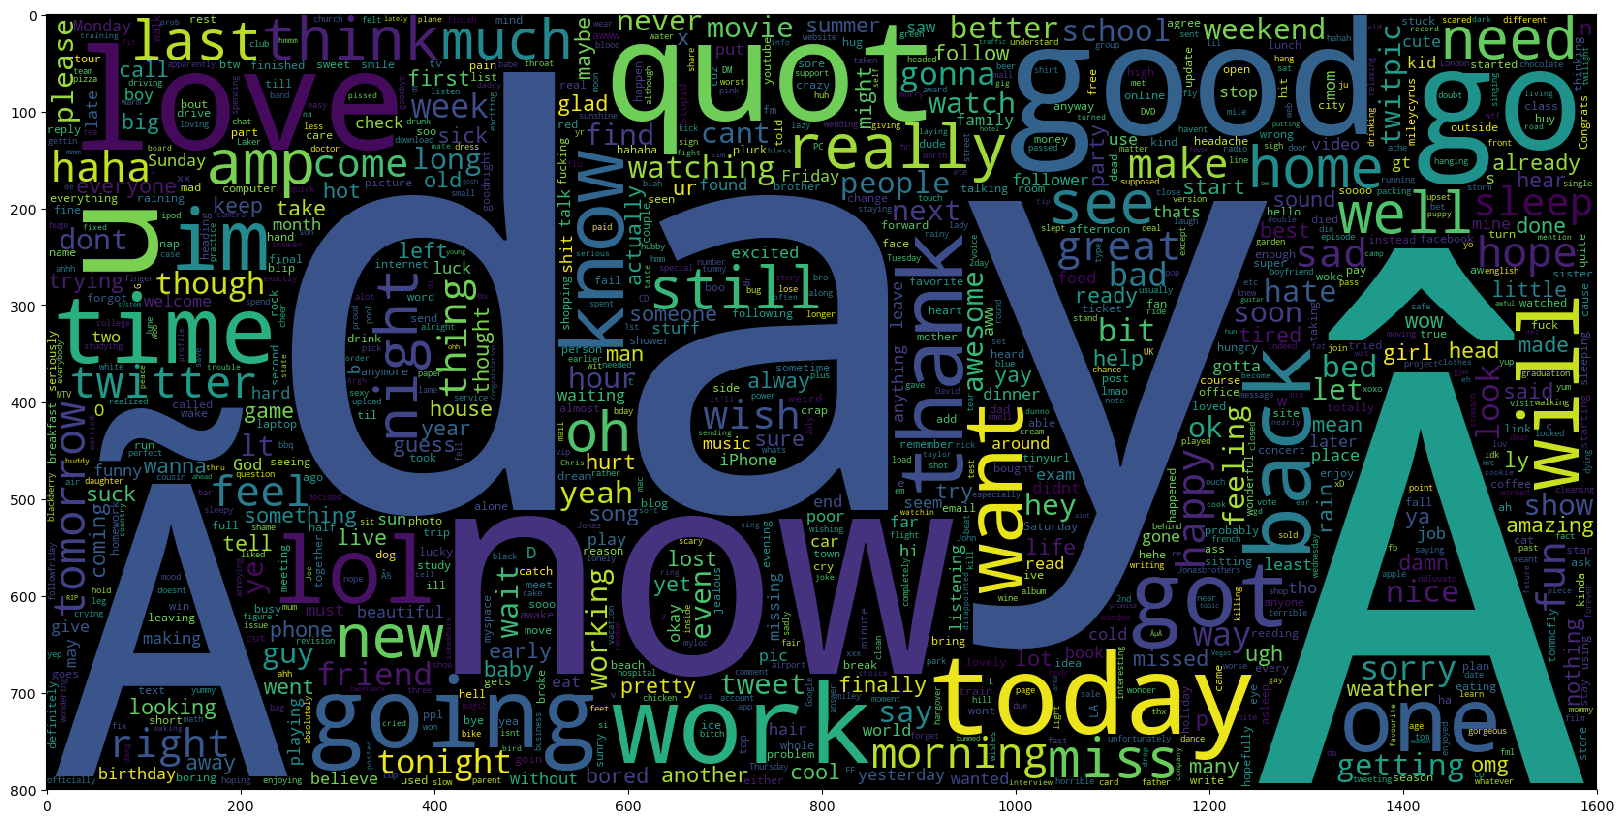

In [158]:
data_pos = data['text'][50000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [159]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [160]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


In [161]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


In [162]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2456
           1       0.81      0.79      0.80      2544

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



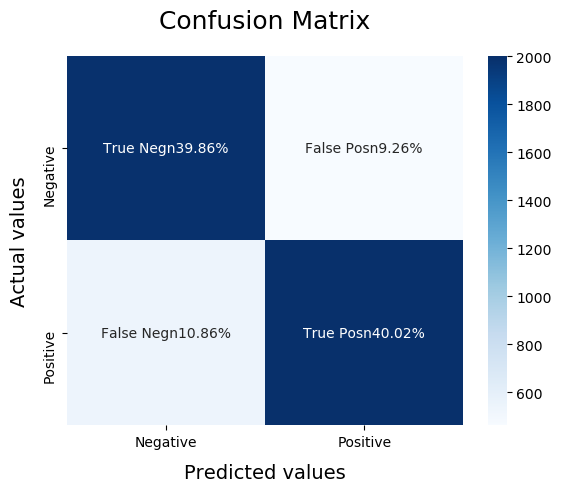

In [163]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)